# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# allow plots to appear directly in the notebook
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# Load the data

In [2]:
df_advertising = pd.read_csv("Advertising.csv")

# Preprocessing

In [3]:
df_advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Check the size 

In [4]:
df_advertising.shape

(200, 4)

# Describe the data

In [5]:
df_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Check for null data

In [6]:
df_advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Relationship between the independent/input variables and the target variable

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

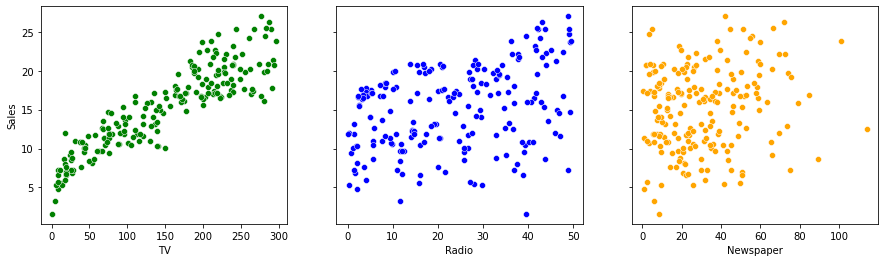

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
sns.scatterplot(ax=axes[0], x=df_advertising['TV'], y=df_advertising['Sales'],color='green')
sns.scatterplot(ax=axes[1], x=df_advertising['Radio'], y=df_advertising['Sales'],color='blue')
sns.scatterplot(ax=axes[2], x=df_advertising['Newspaper'], y=df_advertising['Sales'],color='orange')



# Build Regression model with single input feature

# Simple Linear Regression

Initially, we have considered single attribute, i.e. TV as our input

In [8]:
X = df_advertising[['TV']]
y = df_advertising[["Sales"]]

# Split the data into train and test subset

Import libraries

In [9]:
from sklearn.model_selection import train_test_split


Accuracy on training and testing data for different split size to identify the best split size.                           
We have used R-square and MSE as our evaluation metrics.

In [10]:
# variable size of the test dataset
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
acc1=[]
acc2=[]
acc3=[]
acc4=[]
#train model on various train/test sets and record the accuracies
for num in test_list:    
    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num, random_state=1)
    
    #create a new model object
    LR = LinearRegression()
    #train the model on the train data
    LR.fit(X_train,y_train)
    
    #predict the values using trained model for training data
    LRPredict = LR.predict(X_train)
    
    #evaluate the training accuracy of the model
    r2 = r2_score(y_train, LRPredict)
    r2=r2*100
    MSE = mean_squared_error(y_train, LRPredict) 
    
    #predict the values using testing model for training data
    LRPredict = LR.predict(X_test)
    
    #evaluate the testing accuracy of the model
    tr2 = r2_score(y_test, LRPredict)
    tr2=tr2*100
    tMSE = mean_squared_error(y_test, LRPredict)
    
    #save the accuracy of the model
    acc1.append(r2)   #training R-Square
    acc2.append(MSE)  #training MSE
    acc3.append(tr2)   #testing R-square
    acc4.append(tMSE)   #training MSE
    print("************************************************")
    print("R-square at train data-",num,": ",r2) 
    print("R-square at test data-",num,": ",tr2)   
    print("************************************************")
    print("MSE  at train data-",num,": ",MSE)
    print("MSE  at test data-",num,": ",tMSE)

************************************************
R-square at train data- 0.1 :  82.16681108294961
R-square at test data- 0.1 :  61.28702683956344
************************************************
MSE  at train data- 0.1 :  5.149565076213515
MSE  at test data- 0.1 :  5.9149938821562635
************************************************
R-square at train data- 0.2 :  82.36989366715561
R-square at test data- 0.2 :  72.41962282650847
************************************************
MSE  at train data- 0.2 :  5.2050244431773125
MSE  at test data- 0.2 :  5.3042564142323165
************************************************
R-square at train data- 0.3 :  81.55807735284488
R-square at test data- 0.3 :  79.84701565892568
************************************************
MSE  at train data- 0.3 :  5.252456315115158
MSE  at test data- 0.3 :  5.1435588637735865
************************************************
R-square at train data- 0.4 :  78.88266953974853
R-square at test data- 0.4 :  84.0687648637000

MSE  at train data- 0.1 :  5.149565076213515 MSE  at test data- 0.1 :  5.9149938821562635
MSE  at train data- 0.2 :  5.205024443177312 MSE  at test data- 0.2 :  5.3042564142323165
MSE  at train data- 0.3 :  5.252456315115158 MSE  at test data- 0.3 :  5.1435588637735865
MSE  at train data- 0.4 :  5.620497166868532 MSE  at test data- 0.4 :  4.6425608102314735
MSE  at train data- 0.5 :  5.83398357059974  MSE  at test data- 0.5 :  4.638568078076924



R-square at train data- 0.1 :  0.821668110829496 R-square at test data- 0.1 :  0.6128702683956344
R-square at train data- 0.2 :  0.823698936671556 R-square at test data- 0.2 :  0.7241962282650847
R-square at train data- 0.3 :  0.815580773528448 R-square at test data- 0.3 :  0.7984701565892569
R-square at train data- 0.4 :  0.788826695397485 R-square at test data- 0.4 :  0.8406876486370001
R-square at train data- 0.5 :  0.791699506497117 R-square at test data- 0.5 :  0.8303642951255557

Visulaize the train and test R-square

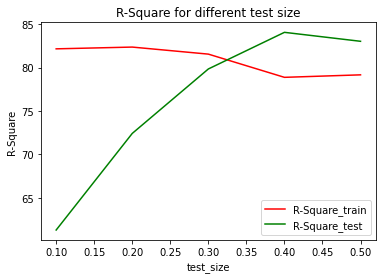

In [11]:
plt.plot(test_list, acc1, color='r', label='R-Square_train')
plt.plot(test_list, acc3, color='g', label='R-Square_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("R-Square")
plt.title("R-Square for different test size")
plt.legend()
plt.show()

According to R-square for test data, 0.4 is the test size

Visulaize the train and test MSE

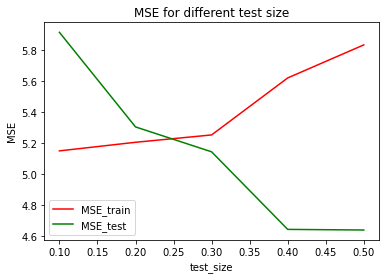

In [12]:
plt.plot(test_list, acc2, color='r', label='MSE_train')
plt.plot(test_list, acc4, color='g', label='MSE_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("MSE")
plt.title("MSE for different test size")
plt.legend()
plt.show()

According to MSE for test data, 0.4 is the test size

Insights:
We aspire for high test accuracy therefore we will go with the test size=0.40

# Create the Linear Regression model for the best acheived split.

Train and test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 1)

Load and train the linear regression model - model1

In [14]:

#creating model1
model1 = LinearRegression()
#Fitting training data
model1 = model1.fit(X_train, y_train)


In [15]:
print(model1.intercept_) #this is the intercept of the line
print(model1.coef_)      # this is the coefficient of the line

[6.98506522]
[[0.05478112]]


Test the model on testing dataset

In [16]:
y_pred = model1.predict(X_test)

# Performance Evaluation using different metrics 

Import libraries from sklearn

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Root Mean Square Error

In [18]:
#Returns the mean squared error; we'll take a square root
RMSE1=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE1

2.1546602540148814

Mean Absolute Error

In [19]:
MAE1=mean_absolute_error(y_test, y_pred)
MAE1

1.7637470190860398

Mean Squared Error

In [20]:
MSE1=mean_squared_error(y_test, y_pred)
MSE1

4.6425608102314735

R-square

In [21]:
#Checking the R-squared on the test set

r21 = r2_score(y_test, y_pred)*100
r21

84.06876486370001

In [22]:
print("RMSE of the Linear Regression model1 is" ,RMSE1)
print("MAE of the Linear Regression model1 is" ,MAE1)
print("MSE of the Linear Regression model1 is" ,MSE1)
print("R-square of the Linear Regression model1 is" ,r21)

RMSE of the Linear Regression model1 is 2.1546602540148814
MAE of the Linear Regression model1 is 1.7637470190860398
MSE of the Linear Regression model1 is 4.6425608102314735
R-square of the Linear Regression model1 is 84.06876486370001


Visualize the line of regression

Text(0.5, 1.0, 'TV')

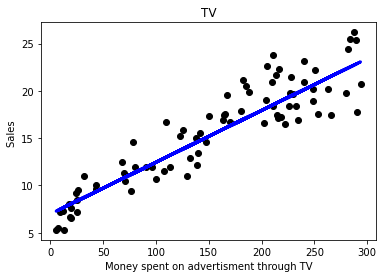

In [23]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Money spent on advertisment through TV')
plt.ylabel('Sales ')
plt.title('TV')

Visualize the actual and forecased sales

Text(0.5, 1.0, 'TV')

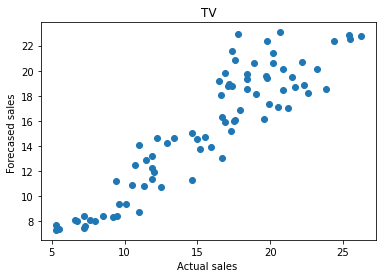

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales ')
plt.ylabel('Forecased sales ')
plt.title('TV')

# K-Folds Cross validation

Import libraries

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



Check for the best fold using R-square

In [26]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc1=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='r2', cv=folds)
    scores = scores*100
    #save the accuracy of the model
    acc.append(scores)
    acc1.append(scores.mean())
    print("R-squared of the Linear Regression for" , num,"folds:",scores)
    print("Mean R-squared score for" , num,"folds:",scores.mean())
    print("***************************************************")


R-squared of the Linear Regression for 3 folds: [82.10668706 78.97007796 82.10059361]
Mean R-squared score for 3 folds: 81.05911953936251
***************************************************
R-squared of the Linear Regression for 4 folds: [78.75052291 86.43960076 76.9671719  80.85559928]
Mean R-squared score for 4 folds: 80.75322371203988
***************************************************
R-squared of the Linear Regression for 5 folds: [72.41962283 89.17782035 76.02461512 79.3868037  80.67060647]
Mean R-squared score for 5 folds: 79.53589369363915
***************************************************
R-squared of the Linear Regression for 6 folds: [70.99495414 86.50302828 85.88189219 71.58812883 87.00745584 75.36457824]
Mean R-squared score for 6 folds: 79.55667291866658
***************************************************
R-squared of the Linear Regression for 7 folds: [70.91138927 83.17824942 89.80304813 74.97991712 80.98522086 84.67140737
 68.90730706]
Mean R-squared score for 7 folds:

Mean R-squared score for 3 folds: 0.810591195393625  Mean MSE for 3 folds: 5.2383290824964766
Mean R-squared score for 4 folds: 0.807532237120398  Mean MSE for 4 folds: 5.244845884967177
Mean R-squared score for 5 folds: 0.795358936936391  Mean MSE for 5 folds: 5.272758039226234
Mean R-squared score for 6 folds: 0.795566729186665  Mean MSE for 6 folds: 5.28535711816525
Mean R-squared score for 7 folds: 0.790623627464628  Mean MSE for 7 folds: 5.338300950743934
Mean R-squared score for 8 folds: 0.791948280750271  Mean MSE for 8 folds: 5.316811843332724
Mean R-squared score for 9 folds: 0.795666587063558  Mean MSE for 9 folds: 5.313102970371967
Mean R-squared score for 10 folds: 0.78467842751296  Mean MSE for 10 folds: 5.301510927092926

Check for the best fold using MSE

In [27]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc2=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=folds) 
    
    #Here we have used 'neg_mean_squared_error' as our scoring metric. CV tries to maximize
    #the score or accuracy of a metric, so the metrics which need to be minimized are negated. 
    #When it is a metric that should be minimized it returns the negated value and if it is a 
    #score that should be maximized, it is left positive.
    
    scores 
    scores=-scores
    
    #save the accuracy of the model
    acc.append(scores)
    #save the mean accuracy of the model
    acc2.append(scores.mean())
    
    print("MSE of the Linear Regression for" , num,"folds:",scores)
    print("Mean MSE for" , num,"folds:",scores.mean())
    print("***************************************************")

MSE of the Linear Regression for 3 folds: [4.92360196 5.71339273 5.07799256]
Mean MSE for 3 folds: 5.2383290824964766
***************************************************
MSE of the Linear Regression for 4 folds: [5.0916671  4.12777522 6.14709698 5.61284423]
Mean MSE for 4 folds: 5.244845884967177
***************************************************
MSE of the Linear Regression for 5 folds: [5.30425641 4.13711366 6.43837233 4.58515301 5.89889479]
Mean MSE for 5 folds: 5.272758039226234
***************************************************
MSE of the Linear Regression for 6 folds: [5.08917115 4.82538339 3.97866169 7.63527946 4.22565736 5.95798966]
Mean MSE for 6 folds: 5.28535711816525
***************************************************
MSE of the Linear Regression for 7 folds: [5.19492842 5.61261609 3.1586277  6.74767537 5.19563318 5.82718795
 5.63143795]
Mean MSE for 7 folds: 5.338300950743934
***************************************************
MSE of the Linear Regression for 8 folds: [5

Plot the metrics for different folds

Text(0, 0.5, 'MSE')

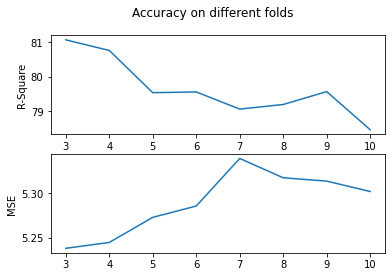

In [28]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuracy on different folds')
axs[0].plot(k_list, acc1)
axs[0].set_ylabel("R-Square")
axs[1].plot(k_list, acc2)
axs[1].set_ylabel("MSE")

Insights: Highest R-square and Lowest MSE achieved at k=3

# Multiple Linear Regression


# Develop linear regression model with two input variables

Take TV, Radio as the input attributes

In [29]:
X = df_advertising[['TV', 'Radio']]
y = df_advertising.Sales

Accuracy on training and testing data for different split size to identify the best split size.

We have used R-square and MSE as our evaluation metrics.

In [30]:
# variable size of the test dataset
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
acc1=[]
acc2=[]
acc3=[]
acc4=[]
#train model on various train/test sets and record the accuracies
for num in test_list:    
    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num, random_state=1)
    
    #create a new model object
    LR = LinearRegression()
    #train the model on the train data
    LR.fit(X_train,y_train)
    
    #predict the values using trained model for training data
    LRPredict = LR.predict(X_train)
    
    #evaluate the training accuracy of the model
    r2 = r2_score(y_train, LRPredict)*100
    MSE = mean_squared_error(y_train, LRPredict) 
    
    #predict the values using testing model for training data
    LRPredict = LR.predict(X_test)
    
    #evaluate the testing accuracy of the model
    tr2 = r2_score(y_test, LRPredict)*100
    tMSE = mean_squared_error(y_test, LRPredict)
    
    #save the accuracy of the model
    acc1.append(r2)   #training R-Square
    acc2.append(MSE)  #training MSE
    acc3.append(tr2)   #testing R-square
    acc4.append(tMSE)   #training MSE
    print("************************************************")
    print("R-square at train data-",num,": ",r2) 
    print("R-square at test data-",num,": ",tr2)   
    print("************************************************")
    print("MSE  at train data-",num,": ",MSE)
    print("MSE  at test data-",num,": ",tMSE)

************************************************
R-square at train data- 0.1 :  90.57911528018568
R-square at test data- 0.1 :  82.7514066149318
************************************************
MSE  at train data- 0.1 :  2.7204029052709404
MSE  at test data- 0.1 :  2.635429831897958
************************************************
R-square at train data- 0.2 :  90.5476269615609
R-square at test data- 0.2 :  87.49222345136188
************************************************
MSE  at train data- 0.2 :  2.790671354003568
MSE  at test data- 0.2 :  2.4054948040980486
************************************************
R-square at train data- 0.3 :  89.93439479032659
R-square at test data- 0.3 :  90.73562242286408
************************************************
MSE  at train data- 0.3 :  2.866791747288931
MSE  at test data- 0.3 :  2.3645069433762345
************************************************
R-square at train data- 0.4 :  89.48398030596712
R-square at test data- 0.4 :  91.16937297400499
*

R-square at train data- 0.1 :  0.905791152801856 R-square at test data- 0.1 :  0.8275140661493179
R-square at train data- 0.2 :  0.905476269615609 R-square at test data- 0.2 :  0.8749222345136188
R-square at train data- 0.3 :  0.899343947903266 R-square at test data- 0.3 :  0.9073562242286408
R-square at train data- 0.4 :  0.894839803059671 R-square at test data- 0.4 :  0.9116937297400498
R-square at train data- 0.5 :  0.90249254708758  R-square at test data- 0.5 :  0.900433660010505
        
MSE  at train data- 0.1 :  2.72040290527094  MSE  at test data- 0.1 :  2.635429831897958
MSE  at train data- 0.2 :  2.790671354003568 MSE  at test data- 0.2 :  2.4054948040980486
MSE  at train data- 0.3 :  2.866791747288931 MSE  at test data- 0.3 :  2.3645069433762345
MSE  at train data- 0.4 :  2.79889823234511  MSE  at test data- 0.4 :  2.573354960234226
MSE  at train data- 0.5 :  2.730943497712766 MSE  at test data- 0.5 :  2.7225709744776894

Visualize the train and test R-square

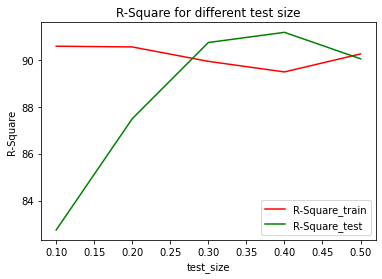

In [31]:
plt.plot(test_list, acc1, color='r', label='R-Square_train')
plt.plot(test_list, acc3, color='g', label='R-Square_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("R-Square")
plt.title("R-Square for different test size")
plt.legend()
plt.show()

According to R-square for test data, 0.4 is the test size

Visualize the train and test MSE

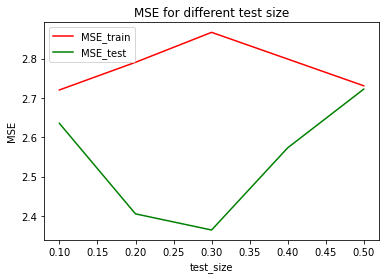

In [32]:
plt.plot(test_list, acc2, color='r', label='MSE_train')
plt.plot(test_list, acc4, color='g', label='MSE_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("MSE")
plt.title("MSE for different test size")
plt.legend()
plt.show()

According to MSE for test data, 0.3 is the test size

Insights: Based on R-square and MSE, we will choose 0.30 as our test size

# Develop the LR model with 2 input Attributes

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [34]:
# instantiate and fit
model2 = LinearRegression()
model2 = model2.fit(X_train, y_train)

# print the coefficients
print(model2.intercept_) #this gives the intercept
print(model2.coef_)     #this gives the coefficient

4.639008926907959
[0.05500479 0.10164376]


Forecast on the testing data

In [35]:
y_pred = model2.predict(X_test)

In [36]:
#Returns the mean squared error; we'll take a square root
RMSE2=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE2

1.5376953350310438

In [37]:
#Mean Absolute Error
MAE2=mean_absolute_error(y_test, y_pred)
MAE2

1.1919753277836755

In [38]:
#Mean Squared Error
MSE2=mean_squared_error(y_test, y_pred)
MSE2

2.3645069433762345

In [39]:
#Checking the R-squared on the test set

r22 = r2_score(y_test, y_pred)*100
r22

90.73562242286408

In [40]:
print("RMSE of the Linear Regression model2 is" ,RMSE2)
print("MAE of the Linear Regression model2 is" ,MAE2)
print("MSE of the Linear Regression model2 is" ,MSE2)
print("R2 of the Linear Regression model2 is" ,r22)

RMSE of the Linear Regression model2 is 1.5376953350310438
MAE of the Linear Regression model2 is 1.1919753277836755
MSE of the Linear Regression model2 is 2.3645069433762345
R2 of the Linear Regression model2 is 90.73562242286408


Visualize the palne of regression

In [41]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(X_test.TV.min(), X_test.TV.max(), 100),np.linspace(X_test.Radio.min(), X_test.Radio.max(), 100))
onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
fittedY=model2.predict(onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)


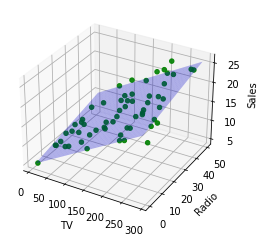

In [42]:
# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['TV'],X_test['Radio'],y_test,c='green', marker='o', alpha=0.9)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

Visualize the actual and forecased sales

Text(0.5, 1.0, 'TV Radio')

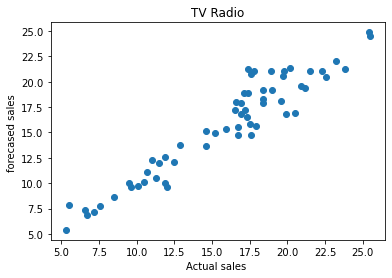

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales ')
plt.ylabel('forecased sales ')
plt.title('TV Radio')

# K-Folds Cross validation


Check for the best fold using R-square

In [44]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc1=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='r2', cv=folds)
    scores = scores*100
    #save the accuracy of the model
    acc.append(scores)
    acc1.append(scores.mean())
    print("Scores of the Linear Regression for" , num,"folds:",scores)
    print("Mean R-square score for" , num,"folds:",scores.mean())
    print("***************************************************")

Scores of the Linear Regression for 3 folds: [90.45754865 84.99686472 93.86632443]
Mean R-square score for 3 folds: 89.77357926437753
***************************************************
Scores of the Linear Regression for 4 folds: [90.49374287 89.21827733 85.72987244 93.49027805]
Mean R-square score for 4 folds: 89.73304267206763
***************************************************
Scores of the Linear Regression for 5 folds: [87.49222345 92.28951512 82.32095756 91.66805445 93.28263368]
Mean R-square score for 5 folds: 89.41067685091585
***************************************************
Scores of the Linear Regression for 6 folds: [86.90679811 91.2287206  89.98549968 81.07102942 96.2406304  91.19118679]
Mean R-square score for 6 folds: 89.43731083326388
***************************************************
Scores of the Linear Regression for 7 folds: [86.41520432 92.58506276 88.58532378 86.89051194 84.69872952 95.95490893
 88.35002002]
Mean R-square score for 7 folds: 89.06853732378049
*

Check for the best fold using MSE

In [45]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc2=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=folds)
    scores 
    scores=-scores
    #save the accuracy of the model
    acc.append(scores)
    acc2.append(scores.mean())
    print("MSE of the Linear Regression for" , num,"folds:",scores)
    print("Mean MSE for" , num,"folds:",scores.mean())
    print("***************************************************")

MSE of the Linear Regression for 3 folds: [2.62574249 4.07604003 1.7401001 ]
Mean MSE for 3 folds: 2.8139608754592054
***************************************************
MSE of the Linear Regression for 4 folds: [2.27783001 3.28194819 3.80847101 1.90855049]
Mean MSE for 4 folds: 2.8191999237204564
***************************************************
MSE of the Linear Regression for 5 folds: [2.4054948  2.94757187 4.74754663 1.85333922 2.04998864]
Mean MSE for 5 folds: 2.8007882337615335
***************************************************
MSE of the Linear Regression for 6 folds: [2.29730874 3.13587276 2.8222131  5.08688708 1.22268646 2.13038033]
Mean MSE for 6 folds: 2.782558076708048
***************************************************
MSE of the Linear Regression for 7 folds: [2.42610559 2.474011   3.53583237 3.53550267 4.18094725 1.53774756
 2.11001792]
Mean MSE for 7 folds: 2.8285949091519504
***************************************************
MSE of the Linear Regression for 8 folds

Mean R-square score for 3 folds: 0.8977357926437755   Mean MSE for 3 folds: 2.8139608754592054
Mean R-square score for 4 folds: 0.8973304267206764   Mean MSE for 4 folds: 2.8191999237204564
Mean R-square score for 5 folds: 0.8941067685091586   Mean MSE for 5 folds: 2.8007882337615335
Mean R-square score for 6 folds: 0.8943731083326387   Mean MSE for 6 folds: 2.782558076708048
Mean R-square score for 7 folds: 0.8906853732378052   Mean MSE for 7 folds: 2.8285949091519504
Mean R-square score for 8 folds: 0.8947932346223221   Mean MSE for 8 folds: 2.80833819622129
Mean R-square score for 9 folds: 0.8949537716848699   Mean MSE for 9 folds: 2.7999066769254153
Mean R-square score for 10 folds: 0.891409109824679   Mean MSE for 10 folds: 2.8062500708993836

Text(0, 0.5, 'MSE')

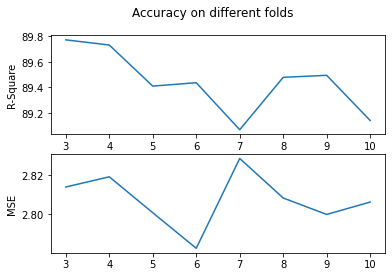

In [46]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuracy on different folds')
axs[0].plot(k_list, acc1)
axs[0].set_ylabel("R-Square")
axs[1].plot(k_list, acc2)
axs[1].set_ylabel("MSE")

According to R-square and MSE, k=3

# Try with different combination of two input variables

Take TV and Newspaper as the input attribute

In [47]:
X = df_advertising[['TV', 'Newspaper']]
y = df_advertising.Sales

Accuracy on training and testing data for different split

In [48]:
# variable size of the test dataset
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
acc1=[]
acc2=[]
acc3=[]
acc4=[]
#train model on various train/test sets and record the accuracies
for num in test_list:    
    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num, random_state=1)
    
    #create a new model object
    LR = LinearRegression()
    #train the model on the train data
    LR.fit(X_train,y_train)
    
    #predict the values using trained model for training data
    LRPredict = LR.predict(X_train)
    
    #evaluate the training accuracy of the model
    r2 = r2_score(y_train, LRPredict)*100
    MSE = mean_squared_error(y_train, LRPredict) 
    
    #predict the values using testing model for training data
    LRPredict = LR.predict(X_test)
    
    #evaluate the testing accuracy of the model
    tr2 = r2_score(y_test, LRPredict)*100
    tMSE = mean_squared_error(y_test, LRPredict)
    
    #save the accuracy of the model
    acc1.append(r2)   #training R-Square
    acc2.append(MSE)  #training MSE
    acc3.append(tr2)   #testing R-square
    acc4.append(tMSE)   #training MSE
    print("************************************************")
    print("R-square at train data-",num,": ",r2) 
    print("R-square at test data-",num,": ",tr2)   
    print("************************************************")
    print("MSE  at train data-",num,": ",MSE)
    print("MSE  at test data-",num,": ",tMSE)

************************************************
R-square at train data- 0.1 :  83.06303507763982
R-square at test data- 0.1 :  66.59550103643693
************************************************
MSE  at train data- 0.1 :  4.890768749600906
MSE  at test data- 0.1 :  5.103906801141768
************************************************
R-square at train data- 0.2 :  83.66859600396062
R-square at test data- 0.2 :  72.61531414744891
************************************************
MSE  at train data- 0.2 :  4.821602058770689
MSE  at test data- 0.2 :  5.2666210716197615
************************************************
R-square at train data- 0.3 :  82.82937134719344
R-square at test data- 0.3 :  80.68542916996702
************************************************
MSE  at train data- 0.3 :  4.890378222893355
MSE  at test data- 0.3 :  4.929574216475723
************************************************
R-square at train data- 0.4 :  80.14188612534761
R-square at test data- 0.4 :  85.10735736091841
*

Visualize the train and test accuracy using R-square

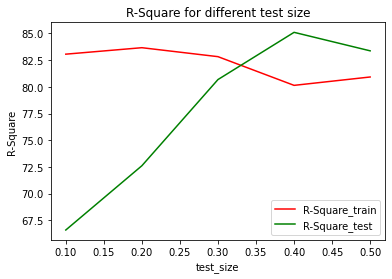

In [49]:
plt.plot(test_list, acc1, color='r', label='R-Square_train')
plt.plot(test_list, acc3, color='g', label='R-Square_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("R-Square")
plt.title("R-Square for different test size")
plt.legend()
plt.show()

According to R-square for test data, 0.4 is the test size

Visualize the train and test accuracy using MSE

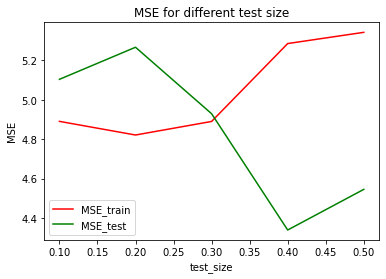

In [50]:
plt.plot(test_list, acc2, color='r', label='MSE_train')
plt.plot(test_list, acc4, color='g', label='MSE_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("MSE")
plt.title("MSE for different test size")
plt.legend()
plt.show()

According to MSE for test data, 0.4 is the test size

Insights: We will choose 0.40 as our test dataset size

# Build a regression model using TV and Newspaper as input attribute

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size = 0.4, random_state = 1)

In [52]:
# instantiate and fit
model3 = LinearRegression()
model3 = model3.fit(X_train, y_train)

# print the coefficients
print(model3.intercept_)
print(model3.coef_)

6.222629440309596
[0.05440187 0.02793172]


Forecast on test data

In [53]:
y_pred = model3.predict(X_test)

In [54]:
#Returns the mean squared error; we'll take a square root
RMSE3=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE3

2.083243142401727

In [55]:
#Mean Absolute Error
MAE3=mean_absolute_error(y_test, y_pred)
MAE3

1.659685609454587

In [56]:
#Mean Squared Error
MSE3=mean_squared_error(y_test, y_pred)
MSE3

4.3399019903638205

In [57]:
#Checking the R-squared on the test set

r23 = r2_score(y_test, y_pred)*100
r23

85.10735736091841

In [58]:
print("RMSE of the Linear Regression model3 is" ,RMSE3)
print("MAE of the Linear Regression model3 is" ,MAE3)
print("MSE of the Linear Regression model3 is" ,MSE3)
print("R2 of the Linear Regression model3 is" ,r23)

RMSE of the Linear Regression model3 is 2.083243142401727
MAE of the Linear Regression model3 is 1.659685609454587
MSE of the Linear Regression model3 is 4.3399019903638205
R2 of the Linear Regression model3 is 85.10735736091841


Visualize the plane of regression

In [59]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(X_test.TV.min(), X_test.TV.max(), 100),np.linspace(X_test.Newspaper.min(), X_test.Newspaper.max(), 100))
onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'Newspaper': y_surf.ravel()})
fittedY=model3.predict(onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

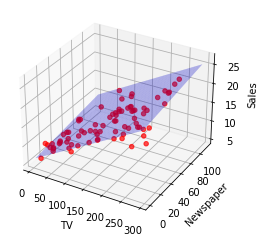

In [60]:
# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['TV'],X_test['Newspaper'],y_test,c='red', marker='o', alpha=0.7)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('TV')
ax.set_ylabel('Newspaper')
ax.set_zlabel('Sales')
plt.show()

Visualize the actual and forecased sales

Text(0.5, 1.0, 'TV Newspaper')

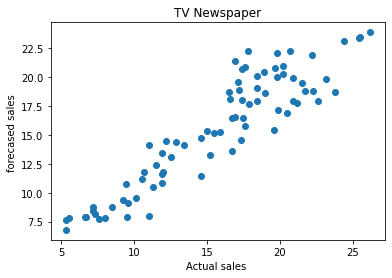

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales ')
plt.ylabel('forecased sales ')
plt.title('TV Newspaper')

# k-fold Cross validation

Check for the best fold using R-square

In [62]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc1=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='r2', cv=folds)
    scores = scores*100
    #save the accuracy of the model
    acc.append(scores)
    acc1.append(scores.mean())
    print("Scores of the Linear Regression for" , num,"folds:",scores)
    print("Mean R-square score for" , num,"folds:",scores.mean())
    print("***************************************************")

Scores of the Linear Regression for 3 folds: [83.1173394  80.93019362 82.21396253]
Mean R-square score for 3 folds: 82.08716518175252
***************************************************
Scores of the Linear Regression for 4 folds: [78.43923497 87.52025781 79.47961415 80.9755191 ]
Mean R-square score for 4 folds: 81.60365650768213
***************************************************
Scores of the Linear Regression for 5 folds: [72.61531415 90.52263579 78.17917748 81.06665012 80.54058915]
Mean R-square score for 5 folds: 80.58487333782723
***************************************************
Scores of the Linear Regression for 6 folds: [71.16110586 87.77633651 85.37949734 75.16028105 87.54210465 74.81642627]
Mean R-square score for 6 folds: 80.30595861290901
***************************************************
Scores of the Linear Regression for 7 folds: [74.50409348 82.38379399 90.39339057 77.81657668 82.74500072 84.88414529
 69.52428841]
Mean R-square score for 7 folds: 80.32161273467149
*

Check for the best fold using MSE


In [63]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc2=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=folds)
    scores 
    scores=-scores
    #save the accuracy of the model
    acc.append(scores)
    acc2.append(scores.mean())
    print("MSE of the Linear Regression for" , num,"folds:",scores)
    print("Mean MSE for" , num,"folds:",scores.mean())
    print("***************************************************")

MSE of the Linear Regression for 3 folds: [4.64550645 5.18087004 5.04583023]
Mean MSE for 3 folds: 4.957402244347851
***************************************************
MSE of the Linear Regression for 4 folds: [5.16625598 3.79882404 5.47656594 5.57768558]
Mean MSE for 4 folds: 5.004832884840358
***************************************************
MSE of the Linear Regression for 5 folds: [5.26662107 3.62301627 5.85978414 4.21149175 5.93857314]
Mean MSE for 5 folds: 4.979897272187188
***************************************************
MSE of the Linear Regression for 6 folds: [5.06001848 4.37015532 4.12024292 6.67531522 4.05176973 6.09055827]
Mean MSE for 6 folds: 5.0613433243448736
***************************************************
MSE of the Linear Regression for 7 folds: [4.55330819 5.87768798 2.97576207 5.98265561 4.71478769 5.7463153
 5.51969169]
Mean MSE for 7 folds: 5.052886934292576
***************************************************
MSE of the Linear Regression for 8 folds: [4

Visualise the accuracy for differet folds

Text(0, 0.5, 'MSE')

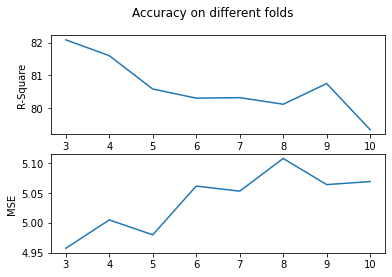

In [64]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuracy on different folds')
axs[0].plot(k_list, acc1)
axs[0].set_ylabel("R-Square")
axs[1].plot(k_list, acc2)
axs[1].set_ylabel("MSE")

Insights: We got the highest R-sqaure and lowest MSE for k=3 

# Try with three input features

In [65]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df_advertising[feature_cols]
y = df_advertising[["Sales"]]

Accuracy on training and testing data for different split

In [66]:
# variable size of the test dataset
test_list=[0.1, 0.2, 0.3, 0.4, 0.5]
acc1=[]
acc2=[]
acc3=[]
acc4=[]
#train model on various train/test sets and record the accuracies
for num in test_list:    
    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num, random_state=1)
    
    #create a new model object
    LR = LinearRegression()
    #train the model on the train data
    LR.fit(X_train,y_train)
    
    #predict the values using trained model for training data
    LRPredict = LR.predict(X_train)
    
    #evaluate the training accuracy of the model
    r2 = r2_score(y_train, LRPredict)*100
    MSE = mean_squared_error(y_train, LRPredict) 
    
    #predict the values using testing model for training data
    LRPredict = LR.predict(X_test)
    
    #evaluate the testing accuracy of the model
    tr2 = r2_score(y_test, LRPredict)*100
    tMSE = mean_squared_error(y_test, LRPredict)
    
    #save the accuracy of the model
    acc1.append(r2)   #training R-Square
    acc2.append(MSE)  #training MSE
    acc3.append(tr2)   #testing R-square
    acc4.append(tMSE)   #training MSE
    print("************************************************")
    print("R-square at train data-",num,": ",r2) 
    print("R-square at test data-",num,": ",tr2)   
    print("************************************************")
    print("MSE  at train data-",num,": ",MSE)
    print("MSE  at test data-",num,": ",tMSE)

************************************************
R-square at train data- 0.1 :  90.58753277891533
R-square at test data- 0.1 :  82.4136059831796
************************************************
MSE  at train data- 0.1 :  2.717972243111247
MSE  at test data- 0.1 :  2.6870427282240064
************************************************
R-square at train data- 0.2 :  90.5486333977187
R-square at test data- 0.2 :  87.47226291661848
************************************************
MSE  at train data- 0.2 :  2.7903742188245175
MSE  at test data- 0.2 :  2.4093336128923672
************************************************
R-square at train data- 0.3 :  89.93745840124558
R-square at test data- 0.3 :  90.71151423684273
************************************************
MSE  at train data- 0.3 :  2.865919198215475
MSE  at test data- 0.3 :  2.370659971225657
************************************************
R-square at train data- 0.4 :  89.48729986516656
R-square at test data- 0.4 :  91.15353314340993
*

Visualize the train and test accuracy using R-square

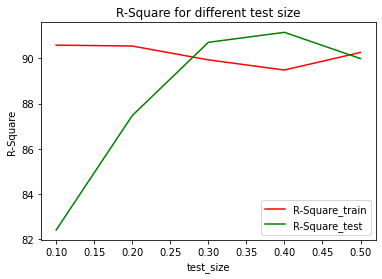

In [67]:
plt.plot(test_list, acc1, color='r', label='R-Square_train')
plt.plot(test_list, acc3, color='g', label='R-Square_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("R-Square")
plt.title("R-Square for different test size")
plt.legend()
plt.show()

R-square is highest for test size 0.4

Visualize the train and test accuracy using MSE

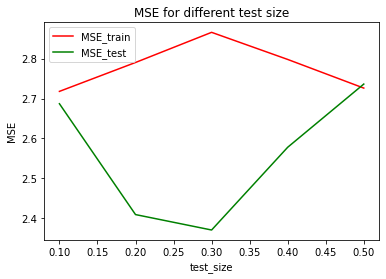

In [68]:
plt.plot(test_list, acc2, color='r', label='MSE_train')
plt.plot(test_list, acc4, color='g', label='MSE_test')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("test_size")
plt.ylabel("MSE")
plt.title("MSE for different test size")
plt.legend()
plt.show()

MSE is lowest for 0.3 test size

Insights: We will choose 0.30 as our test dataset size based on R-square and MSE trade-off

# Build a regression model using TV, Radio and Newspaper as input attribute

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [70]:
# instantiate and fit
model4 = LinearRegression()
model4 = model4.fit(X_train, y_train)

# print the coefficients
print(model4.intercept_) #this is the intercept 
print(model4.coef_)      #this is the coefficient

[4.66143972]
[[ 0.05502392  0.10251003 -0.00150711]]


Forecast on test data

In [71]:
y_pred = model4.predict(X_test)

In [72]:
#Returns the mean squared error; we'll take a square root
RMSE4=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE4

1.5396947656031235

In [73]:
#Mean Absolute Error
MAE4=mean_absolute_error(y_test, y_pred)
MAE4

1.1947417134056744

In [74]:
# Mean Squared Error
MSE4=mean_squared_error(y_test, y_pred)
MSE4


2.370659971225657

In [75]:
#Checking the R-squared on the test set

r24 = r2_score(y_test, y_pred)*100
r24

90.71151423684273

In [76]:
print("RMSE of the Linear Regression model4 is" ,RMSE4)
print("MAE of the Linear Regression model4 is" ,MAE4)
print("MSE of the Linear Regression model4 is" ,MSE4)
print("R2 of the Linear Regression model4 is" ,r24)

RMSE of the Linear Regression model4 is 1.5396947656031235
MAE of the Linear Regression model4 is 1.1947417134056744
MSE of the Linear Regression model4 is 2.370659971225657
R2 of the Linear Regression model4 is 90.71151423684273


Visualize the actual and forecased sales

Text(0.5, 1.0, 'TV Radio Newspaper')

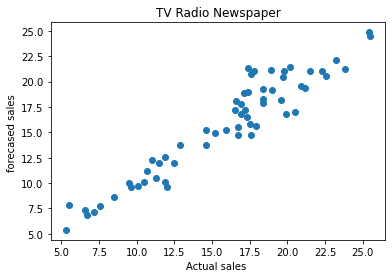

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales ')
plt.ylabel('forecased sales ')
plt.title('TV Radio Newspaper')

# k-fold Cross validation

Check for the best fold using R-square


In [78]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc1=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='r2', cv=folds)
    scores=scores*100 
    #save the accuracy of the model
    acc.append(scores)
    acc1.append(scores.mean())
    print("Scores of the Linear Regression for" , num,"folds:",scores)
    print("Mean R-square score for" , num,"folds:",scores.mean())
    print("***************************************************")

Scores of the Linear Regression for 3 folds: [90.40193074 84.95369288 93.60281237]
Mean R-square score for 3 folds: 89.65281199653457
***************************************************
Scores of the Linear Regression for 4 folds: [90.48917241 89.16733685 85.11778652 93.08649167]
Mean R-square score for 4 folds: 89.46519686269164
***************************************************
Scores of the Linear Regression for 5 folds: [87.47226292 92.28810501 82.27475367 91.62185292 92.87790725]
Mean R-square score for 5 folds: 89.30697635284004
***************************************************
Scores of the Linear Regression for 6 folds: [86.84382004 91.22827922 89.61052907 80.20669641 96.24096556 90.68668236]
Mean R-square score for 6 folds: 89.1361621077645
***************************************************
Scores of the Linear Regression for 7 folds: [86.17035641 92.54764736 88.37558431 86.87144576 84.26846895 95.88791463
 88.0484723 ]
Mean R-square score for 7 folds: 88.8814128179613
***

Check for the best fold using MSE


In [79]:
# vary the number of folds
k_list=[3,4,5,6,7,8,9,10]
acc=[]
acc2=[]
#train model on various k-folds and record the accuracies
for num in k_list:    
    
    #create a new model object
    LR = LinearRegression()
    
    folds = KFold(n_splits = num, shuffle = True, random_state = 1)
    scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=folds)
    scores 
    scores=-scores
    #save the accuracy of the model
    acc.append(scores)
    acc2.append(scores.mean())
    print("MSE of the Linear Regression for" , num,"folds:",scores)
    print("Mean MSE for" , num,"folds:",scores.mean())
    print("***************************************************")

MSE of the Linear Regression for 3 folds: [2.64104656 4.08776892 1.81485746]
Mean MSE for 3 folds: 2.84789097926615
***************************************************
MSE of the Linear Regression for 4 folds: [2.27892516 3.29745443 3.97182704 2.02693445]
Mean MSE for 4 folds: 2.8937852709985585
***************************************************
MSE of the Linear Regression for 5 folds: [2.40933361 2.94811093 4.75995427 1.86361619 2.17350201]
Mean MSE for 5 folds: 2.8309034019022348
***************************************************
MSE of the Linear Regression for 6 folds: [2.30835875 3.13603056 2.92788457 5.31916407 1.22257746 2.25239295]
Mean MSE for 6 folds: 2.861068058436882
***************************************************
MSE of the Linear Regression for 7 folds: [2.46983292 2.48649474 3.60080167 3.54064463 4.29851244 1.56321555
 2.16463356]
Mean MSE for 7 folds: 2.874876501847553
***************************************************
MSE of the Linear Regression for 8 folds: [

Text(0, 0.5, 'MSE')

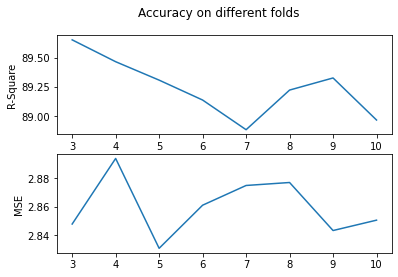

In [80]:
fig, axs = plt.subplots(2)
fig.suptitle('Accuracy on different folds')
axs[0].plot(k_list, acc1)
axs[0].set_ylabel("R-Square")
axs[1].plot(k_list, acc2)
axs[1].set_ylabel("MSE")

According to R-square k=3

# Performance Comparison of developed models

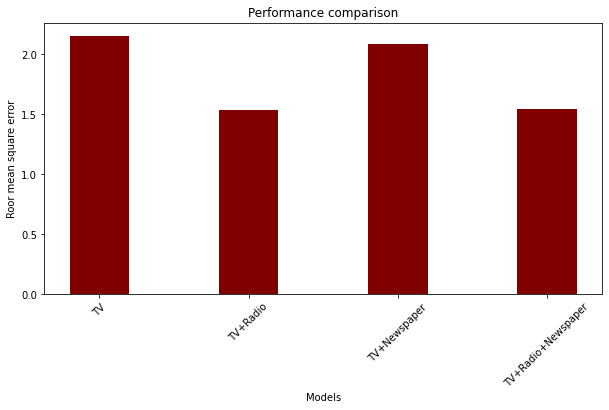

In [81]:
#Compare the performance of all the models collectively
data = {'TV':RMSE1, 'TV+Radio':RMSE2, 'TV+Newspaper':RMSE3,
        'TV+Radio+Newspaper':RMSE4}

models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='maroon',
       width = 0.4)
    
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Roor mean square error")
plt.title("Performance comparison")
plt.show()

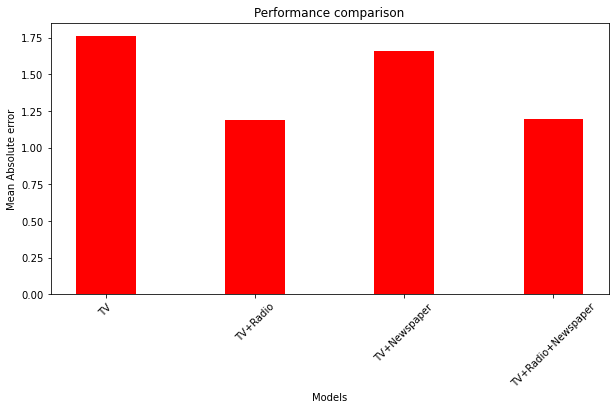

In [82]:
#Compare the performance of all the models collectively
data = {'TV':MAE1, 'TV+Radio':MAE2, 'TV+Newspaper':MAE3,
        'TV+Radio+Newspaper':MAE4}

models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='red',
       width = 0.4)
    
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Mean Absolute error")
plt.title("Performance comparison")
plt.show()

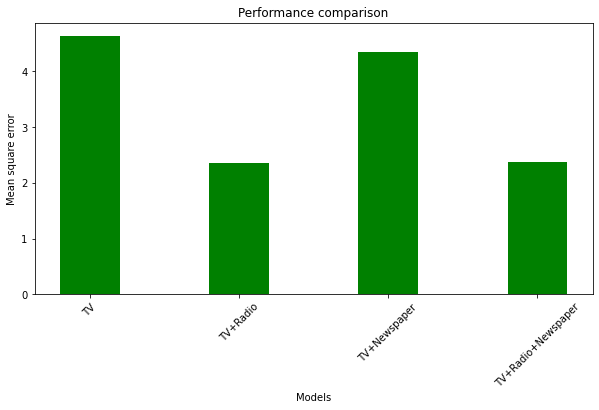

In [83]:
#Compare the performance of all the models collectively
data = {'TV':MSE1, 'TV+Radio':MSE2, 'TV+Newspaper':MSE3,
        'TV+Radio+Newspaper':MSE4}

models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='green',
       width = 0.4)
    
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Mean square error")
plt.title("Performance comparison")
plt.show()

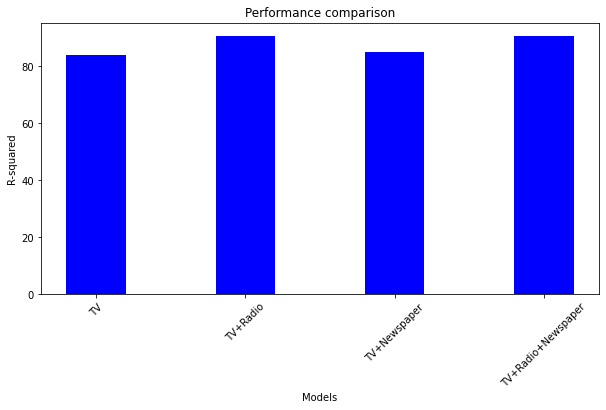

In [84]:
#Compare the performance of all the models collectively
data = {'TV':r21, 'TV+Radio':r22, 'TV+Newspaper':r23,
        'TV+Radio+Newspaper':r24}

models = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(models, values, color ='blue',
       width = 0.4)
    
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Performance comparison")
plt.show()

# Determine correlation between variables

<AxesSubplot:>

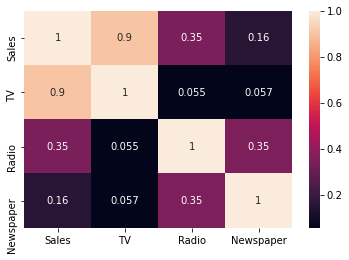

In [85]:
sns.heatmap(df_advertising[['Sales','TV','Radio','Newspaper']].corr(), annot = True)